# ВАРИАНТ №18
* Параметры (a;б^2): (-0,5;4)
* n: 21 1000
* M: 1800
* gamma: 0,95
* alpha: 0,06
* Закон распределения случайной величины Y:
Логистическое с параметрами масштаба и сдвига 0 и 1 соответственно
* Закон распределения случайной величины Z:
Закон распределения числа выпадений “орла“ в 9 бросаниях симметричной монеты


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest, shapiro
import statistics as st
from collections import Counter

# Задание 1

In [ ]:
a = -0.5
sigma_2 = 4
M = 1800
gamma = 0.95
alpha = 0.06
n1 = 21
n2 = 1000

**Для n = 21**

1.1

In [ ]:
# а) Интервальная оценка для матожидания
X = np.random.normal(a, np.sqrt(sigma_2), size=n1)
ty = 2.0860
a_left = X.mean() - np.sqrt(sigma_2) * ty / n1 ** 0.5
a_right = X.mean() + np.sqrt(sigma_2) * ty / n1 ** 0.5
print(f'Интервальная оценка для матожидания: ({a_left} ; {a_right})')

# б) Интервальная оценка для дисперсии
xi_left = 34.2 # (1 - y) / 2 = 0.025
xi_right = 9.59 # (1 + y) / 2 = 0.975
s_left = (n1 - 1) * st.variance(X) / xi_left
s_right = (n1 - 1) * st.variance(X) / xi_right
print(f'Интервальная оценка для дисперсии: ({s_left} ; {s_right})')

Интервальная оценка для матожидания: (-0.9474853710229074 ; 0.873324705106213)
Интервальная оценка для дисперсии: (1.9895219723545887 ; 7.095062716843269)


1.2

ShapiroResult(statistic=0.8935938477516174, pvalue=0.026339907199144363)
Ошибка первого рода
[-4.01721462 -2.81456001 -1.6119054  -0.40925079  0.79340382  1.99605843
  3.19871305]


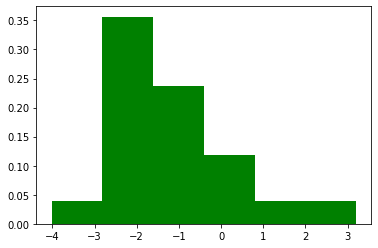

In [ ]:
np.random.seed(31)
X = np.random.normal(a, np.sqrt(sigma_2), n1)
X_shapiro = shapiro(X)
print(X_shapiro)

if X_shapiro.pvalue > alpha:
  print("Гипотеза верна")
else: 
  print(f"Ошибка первого рода")
num_bins = 6 # 1 + 3.322 * lg(21) = 5.39241
n_, bins, patches = plt.hist(X, num_bins, density = 1, color ='green')
print(bins)

ShapiroResult(statistic=0.9697641730308533, pvalue=0.727807343006134)
Гипотеза верна
[-5.4735613  -3.7675409  -2.0615205  -0.35550009  1.35052031  3.05654071
  4.76256111]


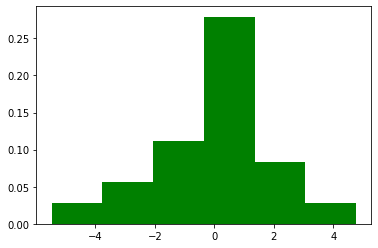

In [ ]:
np.random.seed(6)
X = np.random.normal(a, np.sqrt(sigma_2), n1)
X_shapiro = shapiro(X)
print(X_shapiro)

if X_shapiro.pvalue > alpha:
  print("Гипотеза верна")
else: 
  print(f"Ошибка первого рода")
num_bins = 6 # 1 + 3.322 * lg(21) = 5.39241
n_, bins, patches = plt.hist(X, num_bins, density = 1, color ='green')
print(bins)

1.3

In [ ]:
# Для матожидания
a_left = [0.0] * M
a_right = [0.0] * M
m = 0
for i in range(M):
  X = np.random.normal(a, np.sqrt(sigma_2), n1)
  a_left[i] = X.mean() - np.sqrt(st.variance(X)) * ty / n1 ** 0.5
  a_right[i] = X.mean() + np.sqrt(st.variance(X)) * ty / n1 ** 0.5
  if a_left[i] <= a <= a_right[i]:
    m += 1
print(a_left[0])
print(a_right[0])

n = M
t = 1.96
print(f"Точечная оценка надежности: {m / n}")
left = m / n - t * np.sqrt((m / n) * (1 - m / n) / n)
right = m / n + t * np.sqrt((m / n) * (1 - m / n) / n)
print(f'left: {left}')
print(f'right: {right}')

if left < gamma < right:
  print("Интервал накрыл гамма")
else:
  print("Интервал не накрыл гамма")

-1.10128093307213
0.3299713254752523
Точечная оценка надежности: 0.9405555555555556
left: 0.9296319079462675
right: 0.9514792031648437
Интервал накрыл гамма


1.4

In [ ]:
# Для дисперсии
xi_left = 34.2 # (1 - y) / 2 = 0.025
xi_right = 9.59 # (1 + y) / 2 = 0.975
s_left = [0.0] * M
s_right = [0.0] * M
m = 0
for i in range(M):
  X = np.random.normal(a, np.sqrt(sigma_2), n1)
  s_left[i] = (n1 - 1) * st.variance(X) / xi_left
  s_right[i] = (n1 - 1) * st.variance(X) / xi_right
  if s_left[i] <= sigma_2 <= s_right[i]:
    m += 1


n = M
t = 1.96
print(f"Точечная оценка надежности: {m / n}")
left = m / n - t * np.sqrt((m / n) * (1 - m / n) / n)
right = m / n + t * np.sqrt((m / n) * (1 - m / n) / n)
print(f'left: {left}')
print(f'right: {right}')

if left < gamma < right:
  print("Интервал накрыл гамма")
else:
  print("Интервал не накрыл гамма")

Точечная оценка надежности: 0.9466666666666667
left: 0.9362861797492829
right: 0.9570471535840505
Интервал накрыл гамма


1.5

In [ ]:
count = 0
for i in range(M):
  X = np.random.normal(a, np.sqrt(sigma_2), n1)
  X_shapiro = shapiro(X)
  X_kstest=kstest(X, 'norm', args=[a,np.sqrt(sigma_2)], N=n1)
  if X_shapiro.pvalue > alpha:
    count += 1


print(f"Вероятность: {count / M}")
print(f"Альфа: {alpha}")

Вероятность: 0.9416666666666667
Альфа: 0.06


**Для n = 1000**

1.1

In [ ]:
# а) Интервальная оценка для матожидания
X = np.random.normal(a, np.sqrt(sigma_2), size=n2)
ty = 1.9623
a_left = X.mean() - np.sqrt(sigma_2) * ty / n2 ** 0.5
a_right = X.mean() + np.sqrt(sigma_2) * ty / n2 ** 0.5
print(f'Интервальная оценка для матожидания: ({a_left} ; {a_right})')

# б) Интервальная оценка для дисперсии
xi_left = 1089.53 # (1 - y) / 2 = 0.025
xi_right = 914.2571 # (1 + y) / 2 = 0.975
s_left = (n2 - 1) * st.variance(X) / xi_left
s_right = (n2 - 1) * st.variance(X) / xi_right
print(f'Интервальная оценка для дисперсии: ({s_left} ; {s_right})')

Интервальная оценка для матожидания: (-0.6147681890385893 ; -0.36655469093665294)
Интервальная оценка для дисперсии: (3.6357628587463235 ; 4.332777626216829)


1.2

ShapiroResult(statistic=0.9961509704589844, pvalue=0.014036261476576328)
Ошибка первого рода
[-5.81889891 -4.58832763 -3.35775634 -2.12718505 -0.89661376  0.33395752
  1.56452881  2.7951001   4.02567139  5.25624267  6.48681396  7.71738525]


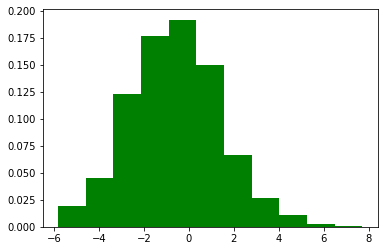

In [ ]:
np.random.seed(2)
X = np.random.normal(a, np.sqrt(sigma_2), n2)
X_shapiro = shapiro(X)
print(X_shapiro)

#for i in range(M):
#  np.random.seed(i)
#  X = np.random.normal(a, np.sqrt(sigma_2), n2)
#  X_shapiro = shapiro(X)
#  print(X_shapiro)
#  if X_shapiro.pvalue < alpha:
#    print(i)
#    break
     

if X_shapiro.pvalue > alpha:
  print("Гипотеза верна")
else: 
  print(f"Ошибка первого рода")
num_bins = 11 # 1 + 3.322 * lg(1000) = 10.966
n_, bins, patches = plt.hist(X, num_bins, density = 1, color ='green')
print(bins)

ShapiroResult(statistic=0.9979177713394165, pvalue=0.24990315735340118)
Гипотеза верна
[-6.60752876 -5.33255293 -4.05757709 -2.78260126 -1.50762543 -0.23264959
  1.04232624  2.31730207  3.59227791  4.86725374  6.14222957  7.41720541]


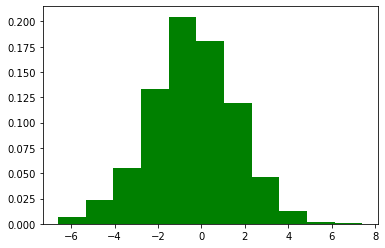

In [ ]:
np.random.seed(1)
X = np.random.normal(a, np.sqrt(sigma_2), n2)
X_shapiro = shapiro(X)
print(X_shapiro)

if X_shapiro.pvalue > alpha:
  print("Гипотеза верна")
else: 
  print(f"Ошибка первого рода")
num_bins = 11 # 1 + 3.322 * lg(1000) = 10.966
n_, bins, patches = plt.hist(X, num_bins, density = 1, color ='green')
print(bins)

1.3

In [ ]:
# Для матожидания
a_left = [0.0] * M
a_right = [0.0] * M
m = 0
for i in range(M):
  X = np.random.normal(a, np.sqrt(sigma_2), n2)
  a_left[i] = X.mean() - np.sqrt(st.variance(X)) * ty / n2 ** 0.5
  a_right[i] = X.mean() + np.sqrt(st.variance(X)) * ty / n2 ** 0.5
  if a_left[i] <= a <= a_right[i]:
    m += 1

n = M
t = 1.96
print(f"Точечная оценка надежности: {m / n}")
left = m / n - t * np.sqrt((m / n) * (1 - m / n) / n)
right = m / n + t * np.sqrt((m / n) * (1 - m / n) / n)
print(f'left: {left}')
print(f'right: {right}')

if left < gamma < right:
  print("Интервал накрыл гамма")
else:
  print("Интервал не накрыл гамма")

Точечная оценка надежности: 0.9533333333333334
left: 0.9435891465889897
right: 0.963077520077677
Интервал накрыл гамма


1.4

In [ ]:
# Для дисперсии
xi_left = 1088.49 # (1 - y) / 2 = 0.025
xi_right = 913.30 # (1 + y) / 2 = 0.975
s_left = [0.0] * M
s_right = [0.0] * M
m = 0
for i in range(M):
  X = np.random.normal(a, np.sqrt(sigma_2), n2)
  s_left[i] = (n2 - 1) * st.variance(X) / xi_left
  s_right[i] = (n2 - 1) * st.variance(X) / xi_right
  if s_left[i] <= sigma_2 <= s_right[i]:
    m += 1

n = M
t = 1.96
print(f"Точечная оценка надежности: {m / n}")
left = m / n - t * np.sqrt((m / n) * (1 - m / n) / n)
right = m / n + t * np.sqrt((m / n) * (1 - m / n) / n)
print(f'left: {left}')
print(f'right: {right}')

if left < gamma < right:
  print("Интервал накрыл гамма")
else:
  print("Интервал не накрыл гамма")

Точечная оценка надежности: 0.9455555555555556
left: 0.9350736527240822
right: 0.956037458387029
Интервал накрыл гамма


1.5

In [ ]:
count = 0
for i in range(M):
  X = np.random.normal(a, np.sqrt(sigma_2), n2)
  X_shapiro = shapiro(X)
  X_kstest=kstest(X, 'norm', args=[a,np.sqrt(sigma_2)], N=n2)
  if X_shapiro.pvalue > alpha:
    count += 1


print(f"Вероятность: {count / M}")
print(f"Альфа: {alpha}")

Вероятность: 0.9361111111111111
Альфа: 0.06


# Задание 2

**Для n =21**

2.1

In [ ]:
# а) Интервальная оценка для матожидания
Y = np.random.logistic(0, 1, size=n1)
ty = 2.0860
a_left = Y.mean() - np.sqrt(sigma_2) * ty / n1 ** 0.5
a_right = Y.mean() + np.sqrt(sigma_2) * ty / n1 ** 0.5
print(f'Интервальная оценка для матожидания: ({a_left} ; {a_right})')

# б) Интервальная оценка для дисперсии
xi_left = 34.2 # (1 - y) / 2 = 0.025
xi_right = 9.59 # (1 + y) / 2 = 0.975
s_left = (n1 - 1) * st.variance(Y) / xi_left
s_right = (n1 - 1) * st.variance(Y) / xi_right
print(f'Интервальная оценка для дисперсии: ({s_left} ; {s_right})')

Интервальная оценка для матожидания: (-0.961847890128941 ; 0.8589621860001794)
Интервальная оценка для дисперсии: (1.9511440763567454 ; 6.958198895870772)


2.2

0.12193482433319891
Ошибка второго рода
[-8.73312011 -6.10836016 -3.48360021 -0.85884026  1.76591968  4.39067963
  7.01543958]


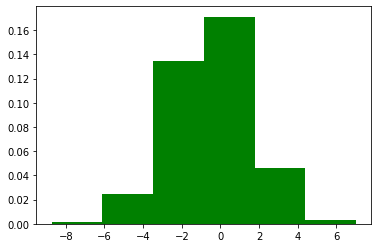

In [ ]:
#for i in range(M):
#  np.random.seed(i)
#  X = np.random.normal(a, np.sqrt(sigma_2), n2)
#  X_shapiro = shapiro(X)
#  print(X_shapiro)
#  if X_shapiro.pvalue < alpha:
#    print(i)
#    break

np.random.seed(2)
Y = np.random.logistic(0, 1, size=n1)
Y_kstest = kstest(Y, 'norm', args = [0, np.sqrt(np.pi ** 2 / 3)])
print(Y_kstest.pvalue)
if Y_kstest.pvalue > alpha:
  print(f"Ошибка второго рода")
else: 
  print("Гипотеза верна")
num_bins = 6 # 1 + 3.322 * lg(21) = 5.39241
n_, bins, patches = plt.hist(X, num_bins, density = 1, color ='green')
print(bins)

0.04276695951853027
Гипотеза верна
[-8.73312011 -6.10836016 -3.48360021 -0.85884026  1.76591968  4.39067963
  7.01543958]


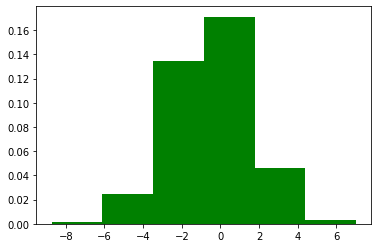

In [ ]:
np.random.seed(15)
Y = np.random.logistic(0, 1, size=n1)
Y_kstest = kstest(Y, 'norm', args = [0, np.sqrt(np.pi ** 2 / 3)])
print(Y_kstest.pvalue)
if Y_kstest.pvalue > alpha:
  print(f"Ошибка второго рода")
else: 
  print("Гипотеза верна")
num_bins = 6 # 1 + 3.322 * lg(21) = 5.39241
n_, bins, patches = plt.hist(X, num_bins, density = 1, color ='green')
print(bins)

2.3

In [ ]:
# Для матожидания
MY_left = [0.0] * M
MY_right = [0.0] * M
m = 0
for i in range(M):
  Y = np.random.logistic(0, 1, n1)
  MY_left[i] = Y.mean() - np.sqrt(st.variance(X)) * ty / n1 ** 0.5
  MY_right[i] = Y.mean() + np.sqrt(st.variance(X)) * ty / n1 ** 0.5
  if MY_left[i] <= 0 <= MY_right[i]:
    m += 1

n = M
t = 1.96
print(f"Точечная оценка надежности: {m / n}")
left = m / n - t * np.sqrt(m / n * (1 - m / n) / n)
right = m / n + t * np.sqrt(m / n * (1 - m / n) / n)
print(f'left: {left}')
print(f'right: {right}')

if left < gamma < right:
  print("Интервал накрыл гамма")
else:
  print("Интервал не накрыл гамма")

Точечная оценка надежности: 0.9638888888888889
left: 0.9552699513861413
right: 0.9725078263916365
Интервал не накрыл гамма


2.4

In [ ]:
# Для дисперсии
xi_left = 34.2 # (1 - y) / 2 = 0.025
xi_right = 9.59 # (1 + y) / 2 = 0.975
s_left = [0.0] * M
s_right = [0.0] * M
m = 0
for i in range(M):
  Y = np.random.logistic(0, 1, n1)
  s_left[i] = (n1 - 1) * st.variance(Y) / xi_left
  s_right[i] = (n1 - 1) * st.variance(Y) / xi_right
  if s_left[i] <= np.pi ** 2 / 3 <= s_right[i]:
    m += 1


n = M
t = 1.96
print(f"Точечная оценка надежности: {m / n}")
left = m / n - t * np.sqrt((m / n) * (1 - m / n) / n)
right = m / n + t * np.sqrt((m / n) * (1 - m / n) / n)
print(f'left: {left}')
print(f'right: {right}')

if left < gamma < right:
  print("Интервал накрыл гамма")
else:
  print("Интервал не накрыл гамма")

Точечная оценка надежности: 0.8961111111111111
left: 0.8820154548421899
right: 0.9102067673800323
Интервал не накрыл гамма


2.5

In [ ]:
count = 0
for i in range (M):
  Y = np.random.logistic(0, 1, n1)
  Y_kstest = kstest(Y, 'norm', args = [0, np.sqrt(np.pi ** 2 / 3)])
  if Y_kstest.pvalue < alpha + 0.04:
    count += 1
print(f"Мощность критерия: {count / M}")

Мощность критерия: 0.08888888888888889


**Для n = 1000**

2.1

In [ ]:
# а) Интервальная оценка для матожидания
Y = np.random.logistic(0, 1, size=n1)
ty = 1.9623
a_left = X.mean() - np.sqrt(sigma_2) * ty / n2 ** 0.5
a_right = X.mean() + np.sqrt(sigma_2) * ty / n2 ** 0.5
print(f'Интервальная оценка для матожидания: ({a_left} ; {a_right})')

# б) Интервальная оценка для дисперсии
xi_left = 1089.53 # (1 - y) / 2 = 0.025
xi_right = 914.2571 # (1 + y) / 2 = 0.975
s_left = (n2 - 1) * st.variance(X) / xi_left
s_right = (n2 - 1) * st.variance(X) / xi_right
print(f'Интервальная оценка для дисперсии: ({s_left} ; {s_right})')

Интервальная оценка для матожидания: (-0.5742029895117775 ; -0.3259894914098411)
Интервальная оценка для дисперсии: (3.7895492576149437 ; 4.5160465285412705)


0.12645071090442006
Ошибка второго рода
[-8.73312011 -7.30143286 -5.86974562 -4.43805837 -3.00637113 -1.57468389
 -0.14299664  1.2886906   2.72037785  4.15206509  5.58375234  7.01543958]


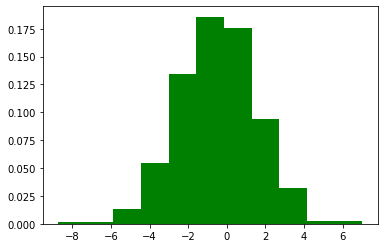

In [ ]:
np.random.seed(0)
Y = np.random.logistic(0, 1, size=n2)
Y_kstest = kstest(Y, 'norm', args = [0, np.sqrt(np.pi ** 2 / 3)])
print(Y_kstest.pvalue)
if Y_kstest.pvalue > alpha:
  print(f"Ошибка второго рода")
else: 
  print("Гипотеза верна")
num_bins = 11 # 1 + 3.322 * lg(1000) = 10.966
n_, bins, patches = plt.hist(X, num_bins, density = 1, color ='green')
print(bins)

0.003934585312752469
Гипотеза верна
[-8.73312011 -7.30143286 -5.86974562 -4.43805837 -3.00637113 -1.57468389
 -0.14299664  1.2886906   2.72037785  4.15206509  5.58375234  7.01543958]


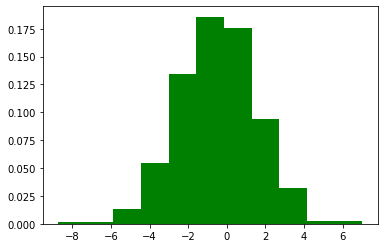

In [ ]:
np.random.seed(2)
Y = np.random.logistic(0, 1, size=n2)
Y_kstest = kstest(Y, 'norm', args = [0, np.sqrt(np.pi ** 2 / 3)])
print(Y_kstest.pvalue)
if Y_kstest.pvalue > alpha:
  print(f"Ошибка второго рода")
else: 
  print("Гипотеза верна")
num_bins = 11 # 1 + 3.322 * lg(1000) = 10.966
n_, bins, patches = plt.hist(X, num_bins, density = 1, color ='green')
print(bins)

In [ ]:
# Для матожидания
MY_left = [0.0] * M
MY_right = [0.0] * M
m = 0
for i in range(M):
  Y = np.random.logistic(0, 1, n2)
  MY_left[i] = Y.mean() - np.sqrt(st.variance(X)) * ty / n2 ** 0.5
  MY_right[i] = Y.mean() + np.sqrt(st.variance(X)) * ty / n2 ** 0.5
  if MY_left[i] <= 0 <= MY_right[i]:
    m += 1

n = M
t = 1.96
print(f"Точечная оценка надежности: {m / n}")
left = m / n - t * np.sqrt(m / n * (1 - m / n) / n)
right = m / n + t * np.sqrt(m / n * (1 - m / n) / n)
print(f'left: {left}')
print(f'right: {right}')

if left < gamma < right:
  print("Интервал накрыл гамма")
else:
  print("Интервал не накрыл гамма")

Точечная оценка надежности: 0.9672222222222222
left: 0.95899652527542
right: 0.9754479191690244
Интервал не накрыл гамма


In [ ]:
# Для дисперсии
xi_left = 1088.49 # (1 - y) / 2 = 0.025
xi_right = 913.30 # (1 + y) / 2 = 0.975
s_left = [0.0] * M
s_right = [0.0] * M
m = 0
for i in range(M):
  Y = np.random.logistic(0, 1, n2)
  s_left[i] = (n2 - 1) * st.variance(Y) / xi_left
  s_right[i] = (n2 - 1) * st.variance(Y) / xi_right
  if s_left[i] <= np.pi ** 2 / 3 <= s_right[i]:
    m += 1


n = M
t = 1.96
print(f"Точечная оценка надежности: {m / n}")
left = m / n - t * np.sqrt((m / n) * (1 - m / n) / n)
right = m / n + t * np.sqrt((m / n) * (1 - m / n) / n)
print(f'left: {left}')
print(f'right: {right}')

if left < gamma < right:
  print("Интервал накрыл гамма")
else:
  print("Интервал не накрыл гамма")

Точечная оценка надежности: 0.8905555555555555
left: 0.8761328350349546
right: 0.9049782760761564
Интервал не накрыл гамма


In [ ]:
count = 0
for i in range (M):
  Y = np.random.logistic(0, 1, n2)
  Y_kstest = kstest(Y, 'norm', args = [0, np.sqrt(np.pi ** 2 / 3)])
  if Y_kstest.pvalue < alpha:
    count += 1
print(f"Мощность критерия: {count / M}")

Мощность критерия: 0.43777777777777777


# Задание 3

In [ ]:
N = 9
p = 0.5

def binomial(n, k):
  if not 0 <= k <= n:
    return 0
  b = 1
  for t in range(min(k, n-k)):
    b *= n
    b /= t+1
    n -= 1
  return int(b)

**Для n = 21**

[5 5 5 5 4 5 4 6 7 4 6 5 5 7 2 2 2 6 6 6 7]
{2: 3, 4: 3, 5: 7, 6: 5, 7: 3}
Количество групп: 5
[0.0703125, 0.24609375, 0.24609375, 0.1640625, 0.0703125]
[1.4765625  5.16796875 5.16796875 3.4453125  1.4765625 ]
xi_practical: 5.404065098261527
Гипотеза верна

[0.14285714 0.14285714 0.33333333 0.23809524 0.14285714]


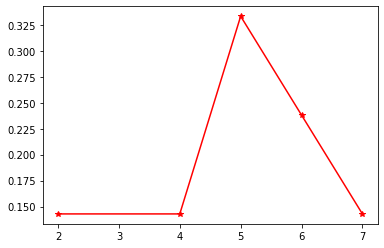

In [ ]:
np.random.seed(0)
Z = np.random.binomial(N, p, n1)
print(Z)

counter = Counter(Z)
range_of_frequen = dict(sorted(counter.items()))
print(range_of_frequen)

value = list(range_of_frequen.values())
key = list(range_of_frequen.keys())
Z_i = np.asarray(key)
freq = np.asarray(value)

n = Z_i.size
print(f"Количество групп: {n}")
p_i = [0.0] * n
for i in range(n):
  p_i[i] = binomial(9, Z_i[i]) * 0.5 ** Z_i[i] * 0.5 ** (9 - Z_i[i])

print(p_i)
print(n1 * np.array(p_i))

xi_practical = 0.0
xi_critical = 14.95634
for i in range(n):
  xi_practical += (freq[i] - n1 * p_i[i]) ** 2 / (n1 * p_i[i])

print(f'xi_practical: {xi_practical}')
if xi_practical > xi_critical:
  print("Ошибка первого рода")
else:
  print("Гипотеза верна")
print()

W_i = freq / n1
print(W_i)
plt.plot(Z_i, W_i, 'r-*')

[4 5 0 4 3 3 3 4 4 5 4 5 3 6 2 5 4 5 3 3 6]
{0: 1, 2: 1, 3: 6, 4: 6, 5: 5, 6: 2}
Количество групп: 6
[0.001953125, 0.0703125, 0.1640625, 0.24609375, 0.24609375, 0.1640625]
[0.04101562 1.4765625  3.4453125  5.16796875 5.16796875 3.4453125 ]
xi_practical: 25.215795953798185
Ошибка первого рода

[0.04761905 0.04761905 0.28571429 0.28571429 0.23809524 0.0952381 ]


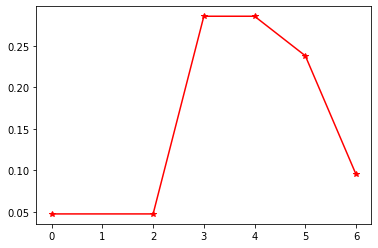

In [ ]:
np.random.seed(1)
Z = np.random.binomial(N, p, n1)
print(Z)

counter = Counter(Z)
range_of_frequen = dict(sorted(counter.items()))
print(range_of_frequen)

value = list(range_of_frequen.values())
key = list(range_of_frequen.keys())
Z_i = np.asarray(key)
freq = np.asarray(value)

n = Z_i.size
print(f"Количество групп: {n}")
p_i = [0.0] * n
for i in range(n):
  p_i[i] = binomial(9, Z_i[i]) * 0.5 ** Z_i[i] * 0.5 ** (9 - Z_i[i])

print(p_i)
print(n1 * np.array(p_i))

xi_practical = 0.0
xi_critical = 14.95634
for i in range(n):
  xi_practical += (freq[i] - n1 * p_i[i]) ** 2 / (n1 * p_i[i])

print(f'xi_practical: {xi_practical}')
if xi_practical > xi_critical:
  print("Ошибка первого рода")
else:
  print("Гипотеза верна")
print()

W_i = freq / n1
print(W_i)
plt.plot(Z_i, W_i, 'r-*')

**Для n = 1000**

{0: 2, 1: 18, 2: 66, 3: 173, 4: 258, 5: 240, 6: 145, 7: 81, 8: 14, 9: 3}
Количество групп: 10
[0.001953125, 0.017578125, 0.0703125, 0.1640625, 0.24609375, 0.24609375, 0.1640625, 0.0703125, 0.017578125, 0.001953125]
[  1.953125  17.578125  70.3125   164.0625   246.09375  246.09375
 164.0625    70.3125    17.578125   1.953125]
xi_practical: 6.6184126984126985
Гипотеза верна

[0.002 0.018 0.066 0.173 0.258 0.24  0.145 0.081 0.014 0.003]


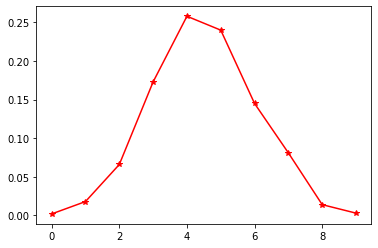

In [ ]:
np.random.seed(0)
Z = np.random.binomial(N, p, n2)
#print(Z)

counter = Counter(Z)
range_of_frequen = dict(sorted(counter.items()))
print(range_of_frequen)

value = list(range_of_frequen.values())
key = list(range_of_frequen.keys())
Z_i = np.asarray(key)
freq = np.asarray(value)

n = Z_i.size
print(f"Количество групп: {n}")
p_i = [0.0] * n
for i in range(n):
  p_i[i] = binomial(9, Z_i[i]) * 0.5 ** Z_i[i] * 0.5 ** (9 - Z_i[i])

print(p_i)
print(n2 * np.array(p_i))

xi_practical = 0.0
xi_critical = 14.95634
for i in range(n):
  xi_practical += (freq[i] - n2 * p_i[i]) ** 2 / (n2 * p_i[i])

print(f'xi_practical: {xi_practical}')
if xi_practical > xi_critical:
  print("Ошибка первого рода")
else:
  print("Гипотеза верна")
print()

W_i = freq / n2
print(W_i)
plt.plot(Z_i, W_i, 'r-*')

{0: 1, 1: 16, 2: 62, 3: 156, 4: 290, 5: 232, 6: 146, 7: 68, 8: 23, 9: 6}
Количество групп: 10
[0.001953125, 0.017578125, 0.0703125, 0.1640625, 0.24609375, 0.24609375, 0.1640625, 0.0703125, 0.017578125, 0.001953125]
[  1.953125  17.578125  70.3125   164.0625   246.09375  246.09375
 164.0625    70.3125    17.578125   1.953125]
xi_practical: 22.748444444444445
Ошибка первого рода

[0.001 0.016 0.062 0.156 0.29  0.232 0.146 0.068 0.023 0.006]


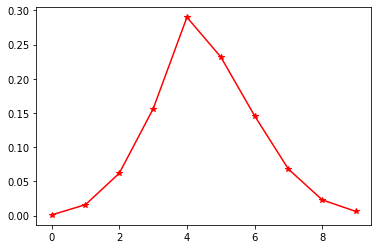

In [ ]:
np.random.seed(14)
Z = np.random.binomial(N, p, n2)
#print(Z)

counter = Counter(Z)
range_of_frequen = dict(sorted(counter.items()))
print(range_of_frequen)

value = list(range_of_frequen.values())
key = list(range_of_frequen.keys())
Z_i = np.asarray(key)
freq = np.asarray(value)

n = Z_i.size
print(f"Количество групп: {n}")
p_i = [0.0] * n
for i in range(n):
  p_i[i] = binomial(9, Z_i[i]) * 0.5 ** Z_i[i] * 0.5 ** (9 - Z_i[i])

print(p_i)
print(n2 * np.array(p_i))

xi_practical = 0.0
xi_critical = 14.95634
for i in range(n):
  xi_practical += (freq[i] - n2 * p_i[i]) ** 2 / (n2 * p_i[i])

print(f'xi_practical: {xi_practical}')
if xi_practical > xi_critical:
  print("Ошибка первого рода")
else:
  print("Гипотеза верна")
print()

W_i = freq / n2
print(W_i)
plt.plot(Z_i, W_i, 'r-*')